# Recommender System with MovieLens Dataset

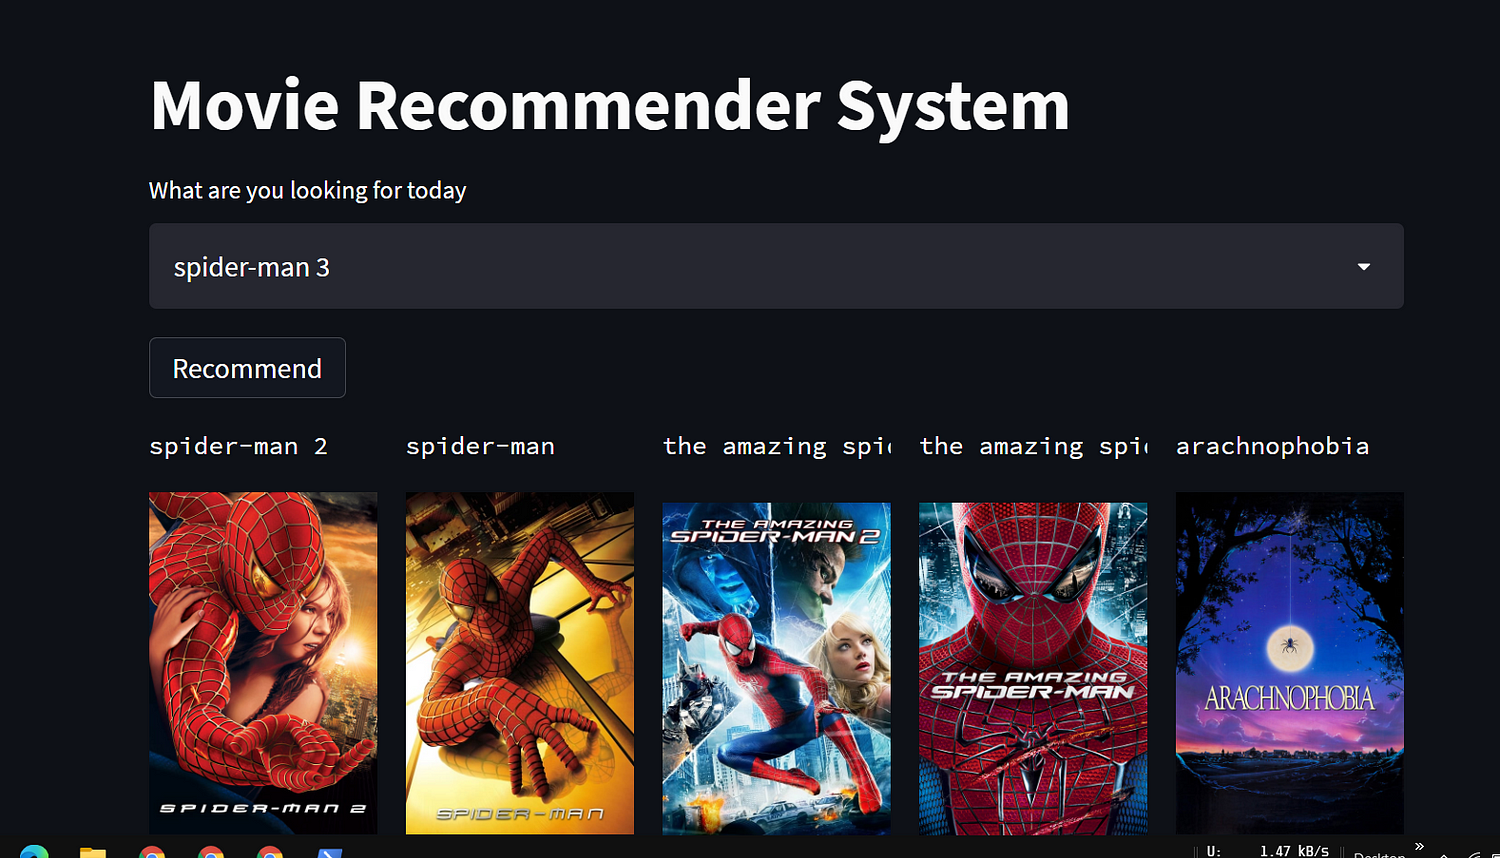

**Task**: The purpose of this exercise is to develop a simple movie recommender system using
unsupervised learning techniques. MovieLens dataset, which is
one of the most common datasets was used in implementing this system


### Workflow
* **Overview of recommender systems**
    * Collaborative Vs Content-based
* **Loading data**
* **Exploration**
    * Movies Exploration
    * Rating Exploration
<br>
* **Collaborative System**
    * Preprocessing
    * Clustering with Kmeans
    * Movie recommendation
* **Content-based System**
    * Preprcessing
    * Clustering with Kmeans
    * Movie recommendation
* **Limtations**
    
    



## Overview of Recommender systems

In [165]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
movies = pd.read_csv('movieLens data/movies.csv')
ratings = pd.read_csv('movieLens data/ratings.csv')

## Exploration

### Ratings Exploration

In [143]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [156]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [152]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [148]:
# checking numer of unique users
ratings['userId'].nunique()

610

In [150]:
#checking numer of unique users
ratings['movieId'].nunique()

9724

<AxesSubplot:xlabel='rating', ylabel='Count'>

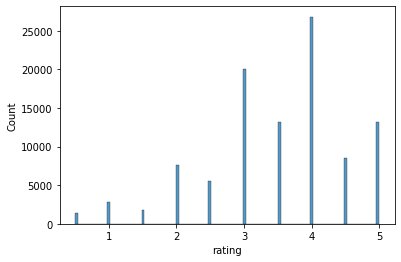

In [146]:
sns.histplot(ratings['rating'])

Most movies were rated a 4

In [158]:
#Checking if every user rated the same number of movies 
ratings.groupby('userId').count()

,movieId,rating,timestamp
userId,,,
1,232,232,232
2,29,29,29
3,39,39,39
4,216,216,216
5,44,44,44
...,...,...,...
606,1115,1115,1115
607,187,187,187
608,831,831,831


From the above, we can see that users ratings are not even across all movies

#### Other Insights

Timestamp column is not needed

### Movies Exploration

In [153]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [155]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


#### **Insights**

# Collaborative System

The collaborative we implemented involves creating a matrix where each row corresponds to a user, each column corresponds to a different movie, and each entry corresponds to a user's rating for a specific movie.


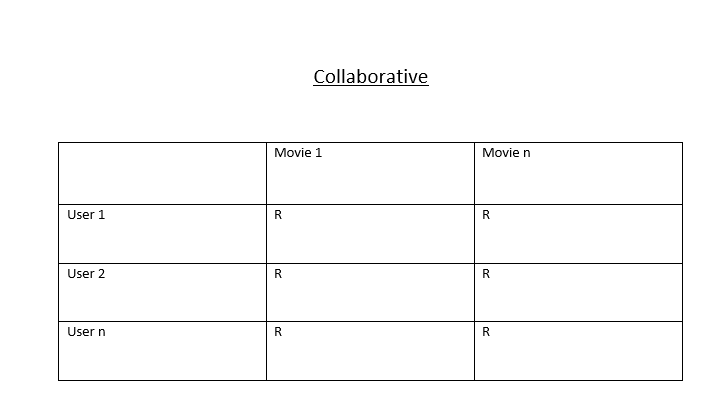

R in the diagram above represents the ratings

## Preprocessing

In [162]:
# Creating a pivot table with rows as users, columns as movies, and values as ratings
pivot_table = ratings.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

In [163]:
# Display the transformed data
pivot_table

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0,0.0,4.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


In [161]:
# coverting data frame to numpy array
X = pivot_table.to_numpy()

## Clustering with Kmeans

### Elbow Method to figure out adequate number of clusters

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

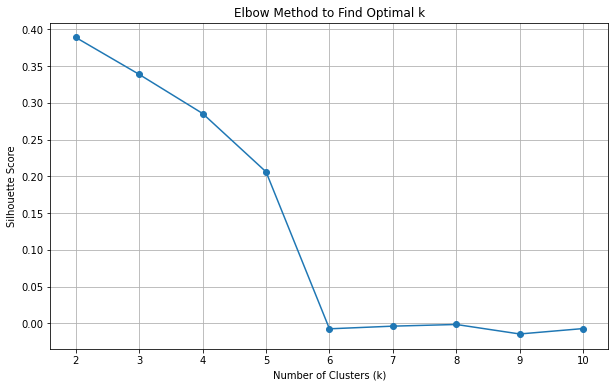

In [189]:
silhouette_scores = []

# Define a range of cluster numbers to try
cluster_range = range(2, 11)

# Perform K-means clustering for each value of 'k' and calculate the silhouette score
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow curve to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method to Find Optimal k')
plt.grid(True)
plt.show()

From the above is at 2. therefore the final model contains can contain 2 clusters

In [190]:
final_model = KMeans(n_clusters=6)

final_model.fit(X) 
cluster_labels = final_model.fit_predict(X)

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Movie Recommendation

According to the instructions, we must create function that takes a user ID and the number of recommendations as inputs and outputs movie recommendations for that user

In [191]:
def movie_recommendations(user_id, num_recommendations, pivot_table, cluster_labels):
    # Find the cluster to which the user belongs
    user_cluster = cluster_labels[user_id - 1]  # Adjust the index as user IDs are 1-indexed in the DataFrame

    # Get the ratings of the user
    user_ratings = pivot_table.iloc[user_id - 1]

    # Get the movie IDs that the user has already rated
    rated_movies = user_ratings[user_ratings > 0].index

    # Get the indices of the movies in the user's cluster
    cluster_indices = np.where(cluster_labels == user_cluster)[0]

    # Get the average ratings of the movies in the user's cluster
    cluster_avg_ratings = X[cluster_indices].mean(axis=0)

    # Sort the movies in the user's cluster based on average ratings (highest first)
    sorted_movies = np.argsort(cluster_avg_ratings)[::-1]

    # Remove the movies that the user has already rated
    recommended_movies = [movie_id for movie_id in sorted_movies if movie_id not in rated_movies]

    # Get the top N movie recommendations
    top_recommendations = recommended_movies[:num_recommendations]

    return top_recommendations

# Example usage:
user_id = 1
num_recommendations = 5
recommendations = movie_recommendations(user_id, num_recommendations, pivot_table, cluster_labels)
print(f"Top {num_recommendations} movie recommendations for User {user_id}: {recommendations}")


Top 5 movie recommendations for User 1: [224, 897, 257, 1938, 659]


# Content-based System

The Content-based we implemented involves creating a matrix where each row corresponds to a movie, each column corresponds to a different genre, and each entry corresponds to whether a movie belongs to the tag

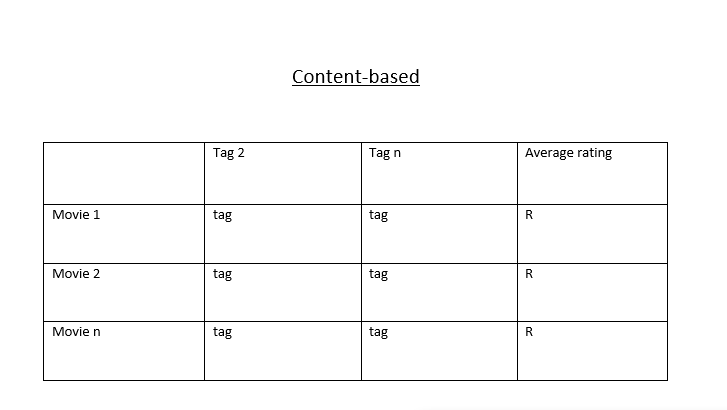

Here we, cluster the movies instead of the users. We then use a user's already liked movies to recommend new ones.

## Preprocessing

In [117]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


The genres are stored as strings. we therefore need to expand them into a Dataframe where colum represents a unique genre.

In [171]:
raw_genres = movies['genres'].values

In [172]:
raw_genres

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ..., 'Drama',
       'Action|Animation', 'Comedy'], dtype=object)

In [173]:
# Finding the unique genres in the table 
genres = [genre for row in movies['genres'].values for genre in row.split('|')]
unique_genres = np.unique(genres)

In [174]:
unique_genres

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='<U18')

**Creating a movie-genre matrix**

In [176]:
matrix = []
for genre_set in raw_genres:
    movie_row = np.zeros(len(unique_genres))
    for genre in unique_genres:
        if genre in genre_set:
            movie_row[genre == unique_genres] = 1
    matrix.append(movie_row)
matrix = pd.DataFrame(matrix,columns=unique_genres)

In [177]:
matrix.index = movies['movieId'] 

In [178]:
matrix

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**if belongs to a specific genre, the entry is 1 else its 0**

In [179]:
#adding the average_ratings column
matrix['average_ratings'] = ratings.groupby('movieId').mean()['rating']

In [180]:
matrix

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,average_ratings
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.920930
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.431818
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.259615
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.357143
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
193583,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.500000
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.500000


In [181]:
matrix.isna().sum()

(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
average_ratings       18
dtype: int64

In [182]:
matrix = matrix.fillna(0)

In [183]:
matrix.isna().sum()

(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
average_ratings       0
dtype: int64

## Clustering With Kmeans

In [187]:
from sklearn.metrics import silhouette_score

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

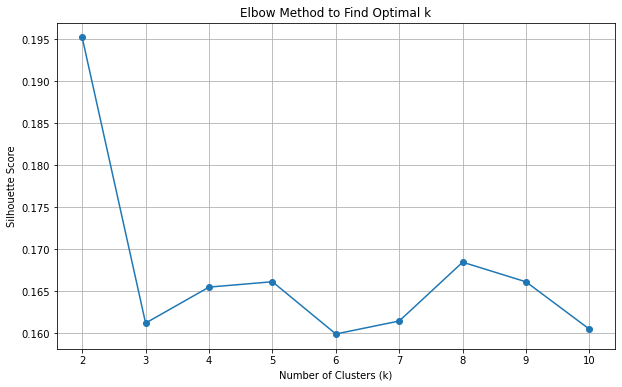

In [188]:
silhouette_scores = []

# Define a range of cluster numbers to try
cluster_range = range(2, 11)

# Perform K-means clustering for each value of 'k' and calculate the silhouette score
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(matrix)
    silhouette_avg = silhouette_score(matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow curve to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method to Find Optimal k')
plt.grid(True)
plt.show()